# Student Succes Dataset

This notebook will contains some of my work on a dataset found on Kaggle (https://www.kaggle.com/competitions/playground-series-s4e6/data?select=test.csv). Note that this is a synthetic dataset created with the goal of The goal of this competition is to predict academic risk of students in higher education.

### Import Libraries


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
from imblearn.over_sampling import SMOTE

### Look at Data

In [2]:
train = pd.read_csv("data/train.csv")

In [3]:
train.drop(columns=["id"], inplace=True)
train.shape

(76518, 37)

In [4]:
train.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,1,1,9238,1,1,126.0,1,1,19,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,17,1,9238,1,1,125.0,1,19,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,1,17,2,9254,1,1,137.0,1,3,19,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,1,1,3,9500,1,1,131.0,1,19,3,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,1,1,2,9500,1,1,132.0,1,19,37,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate


Notes on the meaning of each feature in the dataset (where applicable): <br><br>
       For information about different features of the dataset, info can be found at:
    https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success 

### Target Variable Analysis

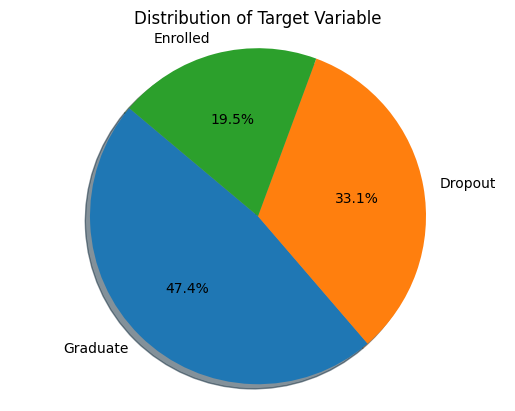

In [5]:
## Plotting Target Feature
target_counts = train["Target"].value_counts()

plt.pie(target_counts,labels=target_counts.index, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Distribution of Target Variable")
plt.show()

### Train Test Split

In [6]:
## Encode target variable
le_encoder = LabelEncoder()

## fit and transform target variable
train["Target"] = le_encoder.fit_transform(train["Target"])

In [7]:
## train test split

y = train["Target"]
X = train.drop(columns=["Target"])

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


### Model Creation And Evaluation

In [8]:
## Model
clf = RandomForestClassifier(n_estimators = 100, random_state=42)

## Fit Model
clf.fit(X_train, y_train)

## Predict
y_pred = clf.predict(X_test)

In [9]:

## Model Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"accuracy_score : {acc : .2f}")

## Classification Report 
print(classification_report(y_test, y_pred))

accuracy_score :  0.83
              precision    recall  f1-score   support

           0       0.90      0.83      0.86      5028
           1       0.65      0.60      0.62      3017
           2       0.85      0.92      0.89      7259

    accuracy                           0.83     15304
   macro avg       0.80      0.78      0.79     15304
weighted avg       0.83      0.83      0.83     15304



#### Quick Refresher on Some of these metrics:
1. Percision:
    TP/TP+FP
    The ratio of correctly predicted positive observations

2. Recall:
    The ration of correctly predicted positive observations to all observations in the actual class.
    It tells you how many of the actual positives are caputed by the model

In [16]:
y_pred_original = le_encoder.inverse_transform(y_pred)
y_test_original = le_encoder.inverse_transform(y_test)

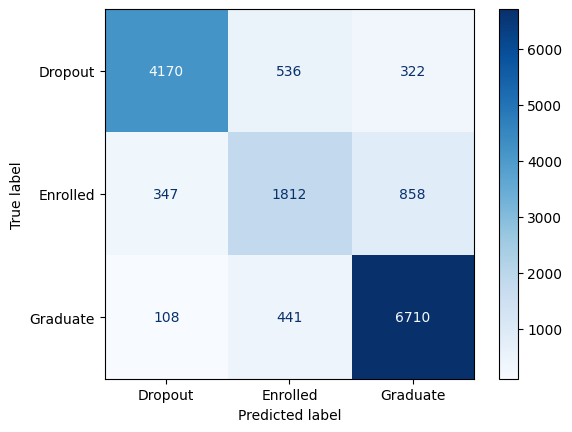

In [23]:
# Compute the confusion matrix
cm = confusion_matrix(y_test_original, y_pred_original, labels=le_encoder.classes_)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()


### What about Oversampling?
- To reduce misclassification of the enrolled class

In [26]:
## Oversampling using SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X,y)

### Model Evaluation on Oversampled Data 

In [ ]:
## train test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled, test_size=0.2, random_state=42)

In [ ]:
## model creation
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
## 

In [ ]:
## trying out on test set
test = pd.read_csv("data/test.csv")
id_col = test["id"]
test.drop(columns=["id"], inplace=True)
final_pred = clf.predict(test)



In [ ]:
def create_sub_file(le_encoder, final_pred, id_col):
    final_pred = le_encoder.inverse_transform(final_pred)

    final_sub = pd.DataFrame({"id": id_col, "Target":final_pred})
    final_sub.to_csv('submission.csv', index=False)

I was able to get an accuracy score of 82% by simply fitting a random forest classifier. This should serve as a good baseline for future improvements. Now lets examine the feature importance.

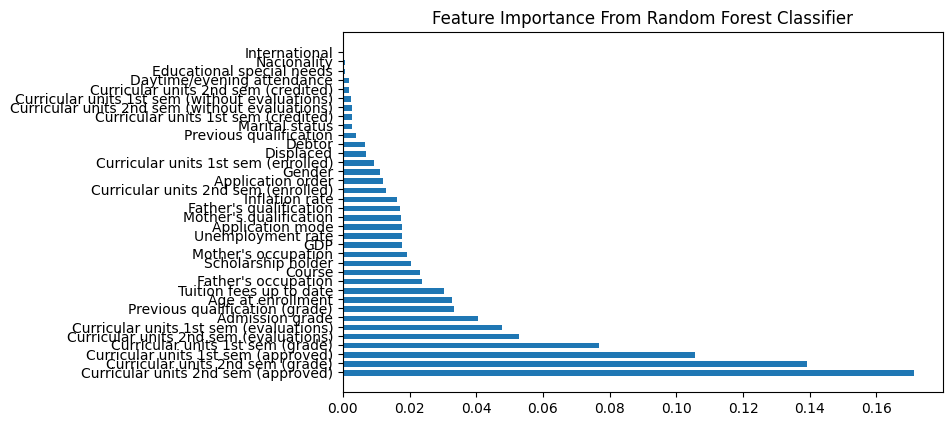

In [ ]:
importance_df = pd.DataFrame({"Features": X.columns, "Importance": clf.feature_importances_})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))


bars = plt.barh(importance_df["Features"], importance_df["Importance"])
for bar in bars:
    bar.set_height(0.6) 

plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)

plt.title("Feature Importance From Random Forest Classifier")
plt.show()

In [ ]:
param_grid = {'n_estimators': [50, 100, 150, 200], 'max_features': ["sqrt", "log2", None]}

In [ ]:
# Hyperparameter tuning
grid_search = GridSearchCV(RandomForestClassifier(), param_grid=param_grid)
grid_search.fit(X_train,y_train)

In [ ]:
## Show best parameters
print(grid_search.best_estimator_)

RandomForestClassifier(n_estimators=200)


In [ ]:
## Generate predicitons for best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [ ]:
## Evaluate best model

## Model Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"accuracy_score : {acc : .2f}")

## Classification Report 
print(classification_report(y_test, y_pred))

accuracy_score :  0.83
              precision    recall  f1-score   support

           0       0.90      0.83      0.86      5028
           1       0.65      0.60      0.62      3017
           2       0.85      0.93      0.89      7259

    accuracy                           0.83     15304
   macro avg       0.80      0.78      0.79     15304
weighted avg       0.83      0.83      0.83     15304



In [ ]:
y_pred = best_model.predict(test)
create_sub_file(le_encoder, y_pred, id_col)

In [ ]:
cm = confus